In [1]:
import matplotlib.pyplot as plt
import torch, torch.nn as nn
from tqdm import trange, tqdm

from Datasets.datasets import stratified_split, DataLoader
from Datasets.mnist_dataloader import MNIST_DataLoader
from Models.sequential import Sequential_Model
from Layers.linear import LinearLayer
from Layers.conv import Conv2DLayer
from Activations.relu import relu
from Activations.sigmoid import sigmoid
from Loss_Func.log_loss import log_loss
from Metrics import accuracy, f1_score
from Layers.flatten import Flatten

In [2]:
if(torch.backends.mps.is_available()):
    device = torch.device("mps")
else:
    device = torch.device("cpu")

device = "cpu"

In [3]:
mnist_dataloader = MNIST_DataLoader("./Datasets/MNIST/")
X_train, y_train, X_test, y_test = mnist_dataloader.load_data()

In [4]:
X_train, y_train, X_val, y_val = stratified_split(X_train, y_train, val_split=0.2, seed=42)

In [5]:
X_train.shape, X_val.shape, X_test.shape

((47995, 28, 28), (12005, 28, 28), (10000, 28, 28))

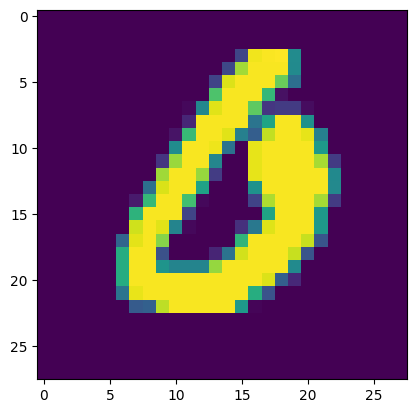

In [6]:
plt.imshow(X_train[0])

In [7]:
model = Sequential_Model(
            [Conv2DLayer(window_size=(3,3), channels_in=1, channels_out=8),
             relu(),
             Conv2DLayer(window_size=(3,3), channels_in=8, channels_out=4),
             relu(),
             Flatten(),
             LinearLayer(24*24*4,1),
             sigmoid()], log_loss
        )

In [8]:
model.to(device)

In [9]:
X_train = torch.unsqueeze(torch.Tensor(X_train), 1)
y_train = torch.tensor(y_train==5, dtype=torch.int8).unsqueeze(0)

In [10]:
batch_size = 258
train_dataloader = DataLoader(X_train, y_train, batch_size)

In [11]:
epochs = 1
loss_history = []
acc_history = []
f1_history = []

for i in range(epochs):
    for [x_train_batch, y_train_batch] in tqdm(train_dataloader):
        preds = model.forward_pass(x_train_batch)
        loss = model.loss_calc(y_train_batch, preds)
        model.backward_pass()
        model.step(1e-5)
        
        loss_history.append(loss)
        acc_history.append(accuracy(y_train_batch, preds))
        f1_history.append(f1_score(y_train_batch, preds))

187it [01:04,  2.88it/s]


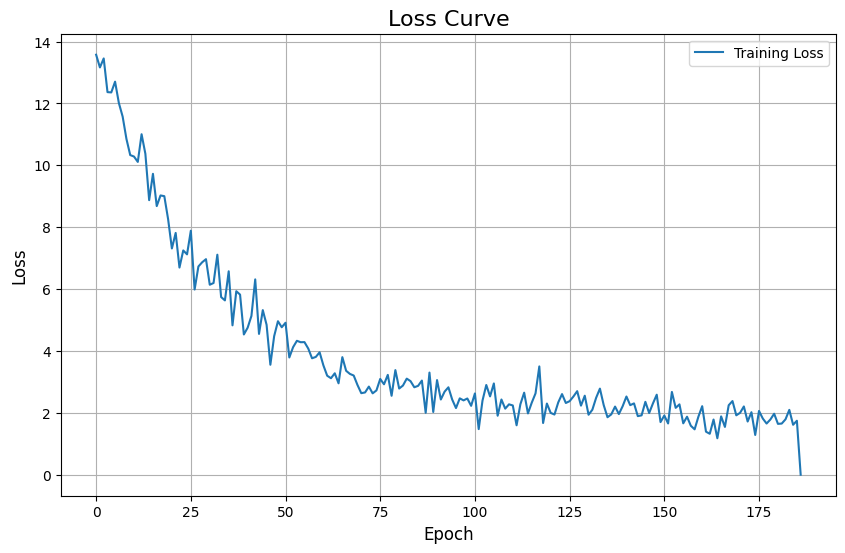

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(loss_history)), loss_history, label='Training Loss')
plt.title('Loss Curve', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

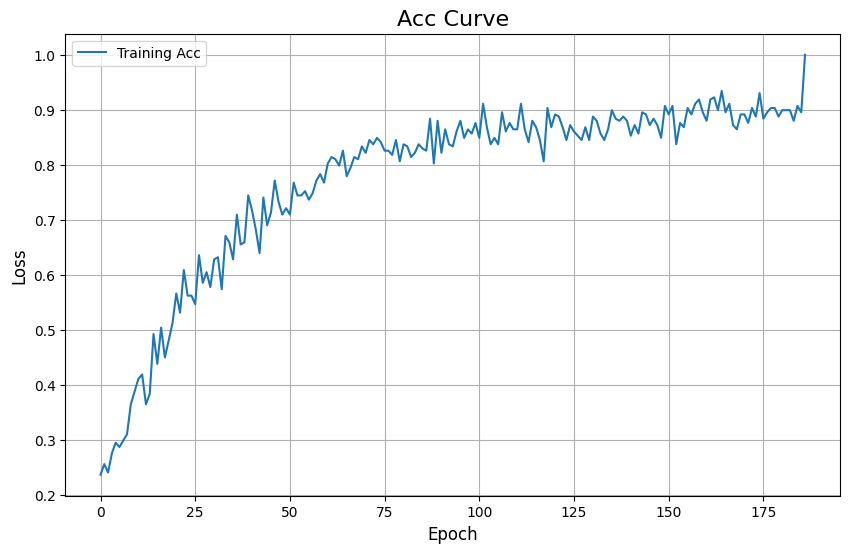

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(acc_history)), acc_history, label='Training Acc')
plt.title('Acc Curve', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

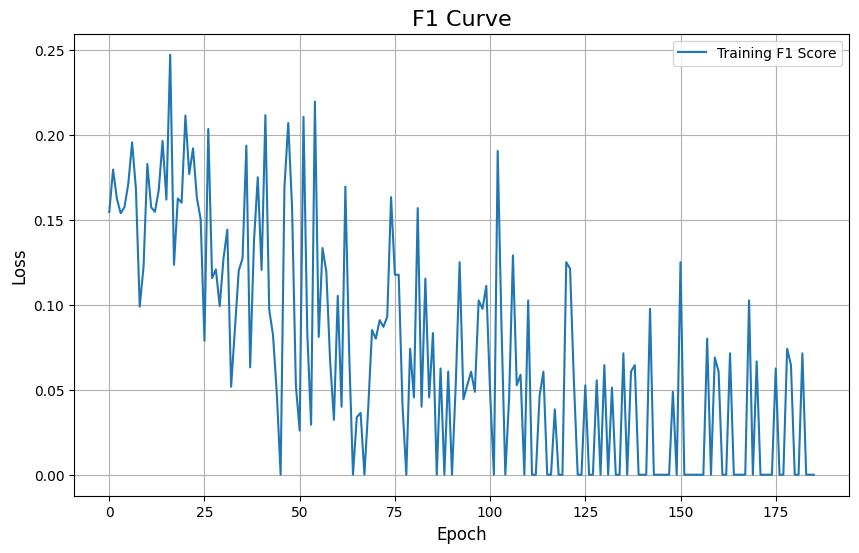

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(f1_history)), f1_history, label='Training F1 Score')
plt.title('F1 Curve', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)